\newpage

In [315]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn import metrics
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import statsmodels.api as sm


In [284]:
Data = pd.read_csv('kidney_disease.csv')


1. Classification Problem Identification

Based on this dataset, our goal is to create a classification model to accurately predict whether a patient has early-stage chronic kidney disease (CKD). Using demographics and clinical results, we will assess paterns in CKD patients, and using machine learning, identify individuals with early-stage CKD.

2. Variable Transformation

In [285]:
Data = Data.drop(columns = 'id')

As of this step in our analysis, the only transformations used will be removing the id. Other transformations will be implemented further on. The types of transformations we will be making will involve removing incomplete observations and splitting the data set.

3. Dataset Overview

In [230]:
Data.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


This dataset originally contains 25 various variables with 400 observations. 11 of which are numeric and 14 are nominal. We can see from the counts of all our variables that some observations are missing values. Since this information is important to our analysis, in future steps we will be removing any incomplete observations. In variables like blood urea and blood glucose random, we see a very high distribution for our results. Considering we have both patients and controls in our dataset, this means that extreme high or low levels may be an indicator for diagnosis.

4. Association Between Variables

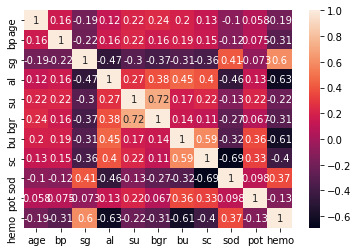

In [231]:
sns.heatmap(Data.corr(), annot=True)

Loooking at our heatmap of the association between variables we see there is not a lot of direct correlation between variables. Our most direct relationship is between blood glucose random and sugar at 0.72. This also makes the most sense considering blood gluclose is the main sugar found in your blood, hence why the two are correlated. Another direct relationship is between serum creatinine and blood urea at 0.59. Again, this correlation makes sense as elevated levels in either of these indicates the kidneys are not working. Because of this we would definitely want serum creatine and blood urea for our feature selection as they not only have a good association, but are good at predicting chronic kidney disease.

5. Missing Value Analysis and Handling.

In [232]:
DF = Data.dropna()
DF 

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd
11,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,380.0,...,32,4500,3.8,yes,yes,no,poor,yes,no,ckd
14,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,157.0,...,16,11000,2.6,yes,yes,yes,poor,yes,no,ckd
20,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,173.0,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd


We have chosen to remove all incomplete observations since the inclusion of said values may affect our statistical anlyses.

6. Outlier Analysis

We have decided to skip our outlier analysis since we are more focused on pattern recognition and many of our variables are nominal.

7. Sub-group Analysis 

In [329]:
Y = DF['class'].map({'ckd':1 , 'notckd':0})
X = DF.drop(columns=['class','sg','rbc','pc','pcc','ba','htn','dm','cad','pe','ane','appet'])

/Users/charlotte/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


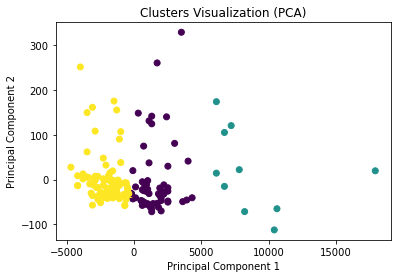

[1 0 1 0 0 1 0 2 1 2 1 1 1 0 0 1 1 2 1 2 0 0 2 2 1 0 0 0 2 1 2 0 2 0 0 1 0
 1 2 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 1 0
 1 1 0 1 0 0 1 1 0 1 1 1 0 1 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1]


/Users/charlotte/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [330]:
# K-means clustering
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X)

# Visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(X)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters Visualization (PCA)')
plt.show()
cluster_labels = kmeans.fit_predict(X)
print(cluster_labels)

8. Data Splitting

In [327]:
x_train, x_test, y_train, y_test = train_test_split(
    X,
    Y, 
    train_size=0.7, 
    random_state=1, 
    stratify=Y
    )

9. Classifier Choices

For this dataset we have chosen to use the K Nearest Neighbours (KNN) classification and the Logistic Regression classification. We have chosen KNN for multiple reasons; for starters, it is strong against outliers. Considering we chose not to continue with outlier analysis, outliers having less influence in this model is definitely a valuable tool. Not only is it effective with outliers, it can handle nonlinear relationships effectively. As for Logistic Regression, it is highly efficient and interpretable which is something we see as valuable in our analysis.

10. Performance Metrics

For our data set, we will be focusing on sensitivity and specificity for comparing the performance of our classifiers. We have chosen these 2 as they both evaluate the accuracy of the model in predicting an individual with disease as possitive (sensitivity), and predicting an individual without a disease as negative. From this we can then evaluate our false positive and negative rates to help us create a more accurate model.

11. Feature Selection/Extraction 

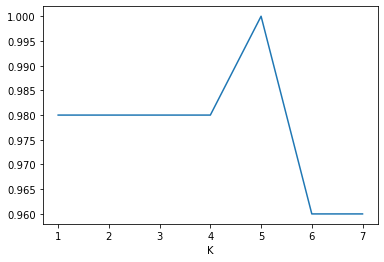

In [328]:
X = scale(X, axis=0)

x_train, x_test, y_train, y_test = train_test_split(
    X,
    Y, 
    train_size=0.7, 
    random_state=1, 
    stratify=Y
    )
k_range = range(1, 8)
scores = [] 

for k in k_range:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(round(metrics.accuracy_score(y_test, y_pred),2))
    
plt.plot(k_range, scores)
plt.xlabel('K')
plt.xticks(range(1,8))
plt.show()

Since we have not scaled our data thus far, there is a chance that one of our variables is dominating our analysis. By scaling, we are ensuring all variables are equally taken into account. To further improve the performance of KNN we have plotted K against accuracy to determine the optimal number of clusters in our analysis. Looking at our above graph we see our optimal K is 5 clusters with almost perfect accuracy of 95.83%.

12. Classifier Comparison 

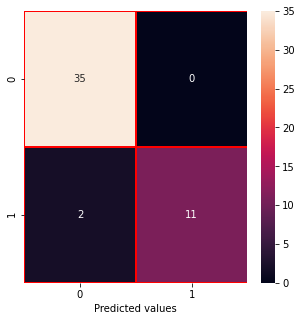

Sensitivity :  0.8461538461538461
Specificity :  1.0


In [277]:
# KNN Classification
cm = confusion_matrix(y_test, y_pred)

f, ax =plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel('Predicted values')
plt.show()

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Specificity : ', specificity)

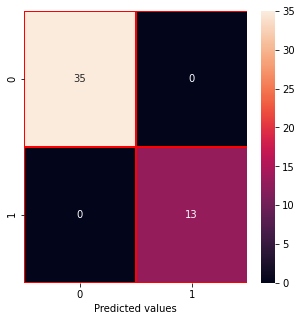

Sensitivity :  1.0
Specificity :  1.0


In [278]:
# Logistic Regression
def_log = LogisticRegression()
def_log.fit(x_train, y_train)

pred_prob = def_log.predict_proba(x_test)

df = pd.DataFrame(
    data = {'prob0': pred_prob[:,1], 'y_test': y_test}
    )

df['y_test_pred'] = df.prob0.map(lambda x: 1 if x>0.5 else 0)
df.head()

cm = confusion_matrix(df.y_test, df.y_test_pred)

f, ax =plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel('Predicted values')
plt.show()

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Specificity : ', specificity)

Looking at our performance metrics for both of our classifiers, both show highly promising results. Our KNN Classifier shows a specificity of 1 and a sensitivity of 0.846. Meaning this classification method results in 100% of individuals without chronic kidney disease to be correctly identified and 84.6% of individuals with chronic kidney disease to be correctly diagnosed. As for Logistic regresssion, we find this to be even greater with a 100% sensitivity and specificity score. This means our model is 100% accurate in predicting those with chronic kidney disease and those without.

13. Interpretable Classifier Insight

In [309]:
y = DF['class'].map({'ckd':1 , 'notckd':0})
x = DF.drop(columns = 'class')

In [310]:
x['rbc'] = x['rbc'].map({'normal':1 , 'abnormal':0})
x['pc'] = x['pc'].map({'normal':1 , 'abnormal':0})
x['pcc'] = x['pcc'].map({'present':1 , 'notpresent':0})
x['ba'] = x['ba'].map({'present':1 , 'notpresent':0})
x['htn'] = x['htn'].map({'yes':1 , 'no':0})
x['dm'] = x['dm'].map({'yes':1 , 'no':0})
x['cad'] = x['cad'].map({'yes':1 , 'no':0})
x['appet'] = x['appet'].map({'good':1 , 'poor':0})
x['pe'] = x['pe'].map({'yes':1 , 'no':0})
x['ane'] = x['ane'].map({'yes':1 , 'no':0})

In [317]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(
    x,
    y, 
    train_size=0.70, 
    random_state=0, 
    stratify=y
    )

logit_model = sm.Logit(y_train, sm.add_constant(x_train))
logit_result = logit_model.fit()

print(logit_result.summary())

         Current function value: 0.000000
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  class   No. Observations:                  110
Model:                          Logit   Df Residuals:                       85
Method:                           MLE   Df Model:                           24
Date:                Fri, 12 Apr 2024   Pseudo R-squ.:                   1.000
Time:                        15:42:24   Log-Likelihood:            -1.7143e-05
converged:                      False   LL-Null:                       -64.455
Covariance Type:            nonrobust   LLR p-value:                 2.443e-16
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.1081   5.74e+05  -1.76e-05      1.000   -1.12e+06    1.12e+06
x1            -1.5228   1.78e+05  -8.54e-06      1.000    -3.5e+0

/Users/charlotte/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


Looking at our summary above, our P column states that every variable is statistically significant. Looking at the absolute of our coefficient values, hypertension is our highest coefficient, or our most significant predictor variable for chronic kidney disease. Meaning, hypertension is our strongest indicator of whether a person has chronic kidney disease or not. On the other hand, our smallest coefficient is blood preasure. Meaning, blood pressure is our least significant variable in predicting chronic kidney disease.

14. [Bonus]

One way we can improve our classifier performance is to train each sub-group individually. We will train based on 5 groups considering that was our most optimal K value. 

15. Team Contributions

All problems have been answered by myself.

16. Link 

https://github.com/charloben/Asssignment-6.git